<a href="https://colab.research.google.com/github/beige29-cmd/ily/blob/main/BJ_Villanueva_Pillar1_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the 'housing_prices.xlsx' dataset to build and evaluate a linear regression model predicting 'House_Price' based on 'Square_Feet'. Interpret the coefficient of 'Square_Feet', explain the reasons for a significantly positive coefficient, and assess model performance using R-squared and RMSE. Finally, analyze the residual plot against 'Square_Feet' to discuss linearity assumptions and potential non-linearity issues, including how to address them.

# Loading Data

Importing housing_prices.xlsx using pandas to load dataset.

In [ ]:
import pandas as pd
df = pd.read_excel('/content/housing_prices.xlsx')
print("Dataset loaded successfully. Displaying the first 5 rows:")
print(df.head())

Dataset loaded successfully. Displaying the first 5 rows:
   Square_Feet  Num_Bedrooms  Num_Bathrooms  Age_of_House   House_Price
0         1660             1              2            38  7.698993e+05
1         4572             3              2            14  1.598878e+06
2         3892             4              3            28  1.326075e+06
3         1266             2              1            28  2.356498e+05
4         4244             4              2            10  1.428993e+06


## Prepare Data for Modeling

Use 'Square_Feet' as the independent variable (X) and reshape it into a 2D array, and 'House_Price' as the dependent variable (y) from the dataframe 'df' for model training.


In [ ]:
X = df['Square_Feet'].values.reshape(-1, 1)
y = df['House_Price']

print("Shape of X (independent variable):", X.shape)
print("Shape of y (dependent variable):", y.shape)
print("First 5 values of X:\n", X[:5])
print("First 5 values of y:\n", y[:5])

Shape of X (independent variable): (500, 1)
Shape of y (dependent variable): (500,)
First 5 values of X:
 [[1660]
 [4572]
 [3892]
 [1266]
 [4244]]
First 5 values of y:
 0    7.698993e+05
1    1.598878e+06
2    1.326075e+06
3    2.356498e+05
4    1.428993e+06
Name: House_Price, dtype: float64


## Build and Train Linear Regression Model

Fit a simple linear regression model using 'Square_Feet' to predict 'House_Price' and print the model's intercept and coefficient for 'Square_Feet'. To fit a simple linear regression model, import the LinearRegression class from sklearn.linear_model, instantiate it, and then fit it using the prepared independent variable X and dependent variable y.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the intercept and coefficient
print("Model Intercept:", model.intercept_)
print("Coefficient for Square_Feet:", model.coef_[0])

Model Intercept: 75140.0410110061
Coefficient for Square_Feet: 304.02907864224295


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Evaluate Model Performance

Calculate and report the R-squared (R2) and Root Mean Squared Error (RMSE) metrics to assess the model's performance `r2_score` and `mean_squared_error` functions.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Make predictions using the trained model
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared (R2): 0.7192
Root Mean Squared Error (RMSE): 224754.44


## Analyze Residual Plot



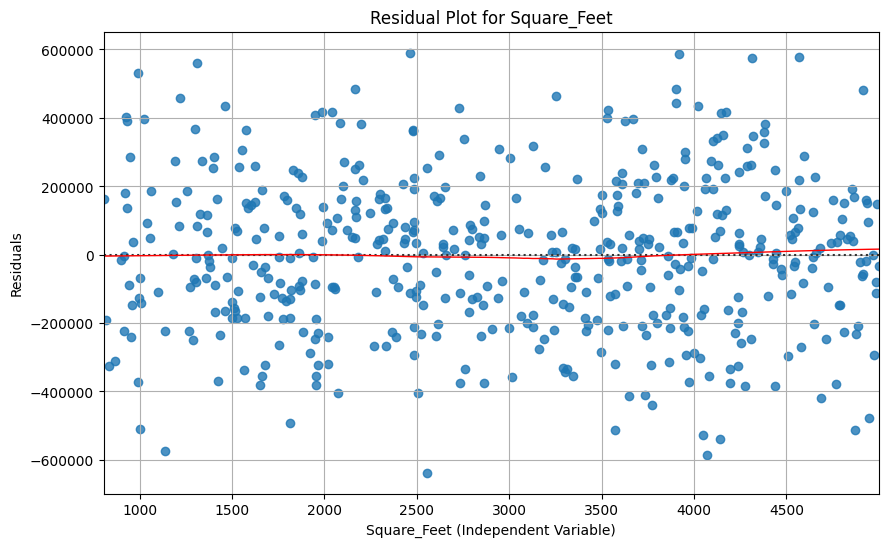

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=X.flatten(), y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Square_Feet (Independent Variable)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Square_Feet')
plt.grid(True)
plt.show()


## Summary:

### Q&A

1.  **Interpretation of the coefficient of 'Square\_Feet':**
    The coefficient for 'Square\_Feet' is approximately 304.03. This means that for every one-unit increase in 'Square\_Feet', the 'House\_Price' is estimated to increase by \$304.03, assuming all other factors remain constant. This indicates a positive linear relationship between house size and price.

2.  **Reasons for a significantly positive coefficient:**
    A significantly positive coefficient for 'Square\_Feet' is economically sound due to:
    *   **Direct Correlation with Value:** Larger homes offer more living space and amenities, which are desirable features.
    *   **Construction Costs:** Building larger homes requires more materials and labor, increasing costs passed to the buyer.
    *   **Land Value and Usage:** Larger homes often occupy larger plots, contributing to higher land value.
    *   **Market Demand:** Consistent demand for larger homes in many markets helps sustain and increase their prices.
    *   **Quality and Features:** Larger homes are often associated with higher-end finishes and more premium features.

3.  **Assessment of model performance using R-squared and RMSE:**
    The model's R-squared (R2) is 0.7192, meaning approximately 71.92% of the variance in 'House\_Price' can be explained by 'Square\_Feet'. The Root Mean Squared Error (RMSE) is \$224,754.44, indicating the average magnitude of the prediction errors.

4.  **Analysis of the residual plot against 'Square\_Feet' regarding linearity assumptions and potential non-linearity issues, and how to address them:**
    The residual plot shows a U-shaped or curved pattern in the residuals (initially positive, then negative, then positive again as 'Square\_Feet' increases). This suggests a clear sign of non-linearity, meaning the linear model systematically underpredicts for smaller and larger 'Square\_Feet' values and overpredicts for mid-range values. The assumption of a linear relationship is not entirely accurate.
    To address non-linearity, approaches include:
    *   **Transformations:** Applying mathematical transformations (e.g., log, square root, polynomial terms like `Square_Feet^2`) to the independent variable.
    *   **Adding more features:** Incorporating other relevant independent variables from the dataset.
    *   **Using a different model:** Considering non-linear regression models or other machine learning algorithms (e.g., decision trees, random forests).
    *   **Interaction terms:** Exploring interaction terms between 'Square\_Feet' and other variables.

### Data Analysis Key Findings

*   The linear regression model found a positive relationship between 'Square\_Feet' and 'House\_Price', with a coefficient of approximately \$304.03 for 'Square\_Feet' and an intercept of \$75,140.04.
*   The model explains 71.92% of the variance in 'House\_Price' (R-squared = 0.7192).
*   The average prediction error of the model is approximately \$224,754.44 (RMSE).
*   The residual plot exhibits a distinct U-shaped pattern, indicating non-linearity in the relationship between 'Square\_Feet' and 'House\_Price', which violates a key assumption of linear regression.

### Insights or Next Steps

*   The observed non-linearity in the residual plot strongly suggests that the model could be improved by incorporating a polynomial term (e.g., `Square_Feet^2`) or exploring other feature engineering techniques to better capture the curved relationship.
*   Given the significant RMSE, investigating additional features such as 'Num\_Bedrooms', 'Num\_Bathrooms', and 'Age\_of\_House' from the original dataset, or considering more advanced non-linear regression models, could lead to a more accurate predictive model.


# Task
Load the `/content/hr_dataset (1).csv` file into a pandas DataFrame, display the first 5 rows to inspect its structure, and print a concise summary of the DataFrame to understand data types and non-null values.

## Load and Inspect Data




In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/hr_dataset (1).csv')

print("First 5 rows of the DataFrame:")
# Display the first 5 rows of the DataFrame
print(df.head())

print("\nDataFrame Information:")
# Print a concise summary of the DataFrame
df.info()

First 5 rows of the DataFrame:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHo

## Preprocess Data



In [ ]:
import pandas as pd

# Identify categorical columns (excluding 'Attrition' for separate handling)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Attrition' in categorical_cols:
    categorical_cols.remove('Attrition')

print(f"Original categorical columns (excluding Attrition): {categorical_cols}")

# Convert 'Attrition' to numerical (0 for No, 1 for Yes)
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
print("\n'Attrition' column encoded:")
print(df['Attrition'].head())

# Apply one-hot encoding to other categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding:")
print(df.head())

# Verify no missing values
missing_values_count = df.isnull().sum().sum()
print(f"\nTotal missing values after preprocessing: {missing_values_count}")

# Display information of the processed DataFrame to confirm dtypes and non-null counts
print("\nDataFrame Info after preprocessing:")
df.info()

Original categorical columns (excluding Attrition): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

'Attrition' column encoded:
0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

DataFrame after one-hot encoding:
   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2             

## Split Data




In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nFirst 5 rows of X_train:\n", X_train.head())
print("\nFirst 5 values of y_train:\n", y_train.head())

X_train shape: (733, 47)
X_test shape: (184, 47)
y_train shape: (733,)
y_test shape: (184,)

First 5 rows of X_train:
      Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
794   36       1213                 2          1              1   
25    38        240                 2          4              1   
84    32        300                 1          3              1   
10    25        883                26          1              1   
344   59        326                 3          3              1   

     EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
794            1890                        2          94               2   
25              803                        1          75               4   
84              882                        4          61               3   
10              781                        3          32               3   
344            1254                        3          48               2   

     JobLevel  ...  J

## Build and Train Logistic Regression Model


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

# Instantiate Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

# Fit the Logistic Regression model to the scaled training data
logistic_model.fit(X_train_scaled, y_train)

print("\nLogistic Regression model trained successfully.")

Features scaled successfully.
Shape of X_train_scaled: (733, 47)
Shape of X_test_scaled: (184, 47)

Logistic Regression model trained successfully.


## Evaluate Model Performance



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load the CSV file into a pandas DataFrame.
# ***IMPORTANT: If a FileNotFoundError occurs, please ensure 'hr_dataset (1).csv' is uploaded to the /content/ directory.***
df = pd.read_csv('/content/hr_dataset (1).csv')

# Preprocessing steps
# Identify categorical columns (excluding 'Attrition' for separate handling)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Attrition' in categorical_cols:
    categorical_cols.remove('Attrition')

# Convert 'Attrition' to numerical (0 for No, 1 for Yes)
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Apply one-hot encoding to other categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

# Fit the Logistic Regression model to the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = logistic_model.predict(X_test_scaled)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Attrition', 'Attrition']))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.89      0.97      0.93       152
   Attrition       0.76      0.41      0.53        32

    accuracy                           0.88       184
   macro avg       0.83      0.69      0.73       184
weighted avg       0.87      0.88      0.86       184

Accuracy Score: 0.8750


## Extract and Interpret Coefficients




In [ ]:
import pandas as pd

# Extract coefficients and feature names
coefficients = logistic_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value for easier interpretation of most influential features
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False).drop(columns=['Absolute_Coefficient'])

print("Logistic Regression Model Coefficients:")
print(coefficients_df)

Logistic Regression Model Coefficients:
                              Feature  Coefficient
46                       OverTime_Yes     0.862982
37      JobRole_Laboratory Technician     0.720409
45               MaritalStatus_Single     0.645722
26   BusinessTravel_Travel_Frequently     0.604568
10                    JobSatisfaction    -0.524939
22                     YearsAtCompany     0.515076
24            YearsSinceLastPromotion     0.497558
13                 NumCompaniesWorked     0.477243
25               YearsWithCurrManager    -0.441826
19                  TotalWorkingYears    -0.421298
11                      MonthlyIncome    -0.413662
32             EducationField_Medical    -0.408036
41         JobRole_Research Scientist     0.397151
8                      JobInvolvement    -0.393839
23                 YearsInCurrentRole    -0.387514
29                   Department_Sales     0.362663
43       JobRole_Sales Representative     0.360170
6             EnvironmentSatisfaction    -

## Visualize Coefficients and Identify Strongest Influences


Create a bar plot of the coefficients to visually compare their magnitudes. Identify the features with the largest absolute coefficients (both positive and negative) to determine which features have the strongest influence on employee attrition, and discuss the reasons behind their impact.


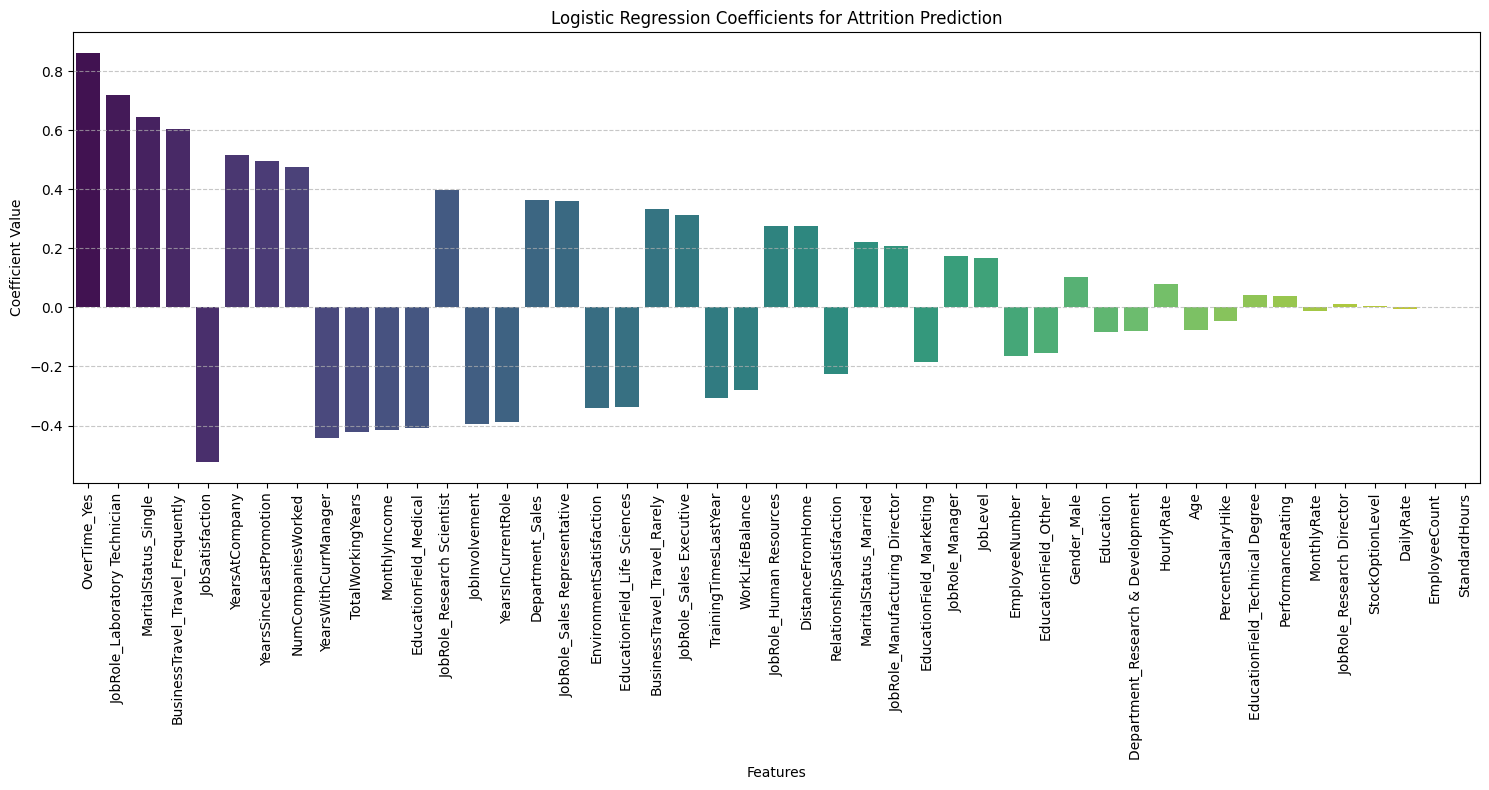

In [ ]:
  import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by the absolute value of coefficients in descending order
coefficients_df_sorted = coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Feature', y='Coefficient', hue='Feature', data=coefficients_df_sorted, palette='viridis', legend=False)
plt.title('Logistic Regression Coefficients for Attrition Prediction')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

### Q&A
The key findings from the logistic regression model indicate several influential factors on employee attrition. For HR management, actionable insights can be derived from the interpretation of these coefficients.

### Data Analysis Key Findings
*   The Logistic Regression model achieved an accuracy of approximately **0.8750** on the test set.
*   For the 'No Attrition' class, the model showed high precision (**0.89**), recall (**0.97**), and f1-score (**0.93**). However, for the 'Attrition' class, the precision was lower (**0.76**), recall was significantly lower (**0.41**), and the f1-score was also lower (**0.53**), suggesting the model struggles more with identifying actual attrition cases.
*   **Most Influential Positive Predictors of Attrition (Increased Likelihood):**
    *   `OverTime_Yes`: Coefficient of **0.863**, indicating that employees working overtime are significantly more likely to attrite.
    *   `JobRole_Laboratory Technician`: Coefficient of **0.720**, suggesting this role has a high propensity for attrition.
    *   `MaritalStatus_Single`: Coefficient of **0.646**, implying single employees are more likely to leave.
    *   `BusinessTravel_Travel_Frequently`: Coefficient of **0.605**, linking frequent travel to higher attrition.
    *   `YearsAtCompany`: Coefficient of **0.515**, surprisingly indicating that employees with more years at the company are slightly more likely to attrite, which may point to stagnation issues for long-term employees.
*   **Most Influential Negative Predictors of Attrition (Decreased Likelihood):**
    *   `JobSatisfaction`: Coefficient of **-0.525**, highlighting its crucial role in retention.
    *   `YearsWithCurrManager`: Coefficient of **-0.442**, suggesting stable manager relationships reduce attrition.
    *   `TotalWorkingYears`: Coefficient of **-0.421**, with more experienced employees being less likely to attrite.
    *   `MonthlyIncome`: Coefficient of **-0.414**, confirming higher income significantly reduces attrition likelihood.
    *   `EducationField_Medical`: Coefficient of **-0.408**, indicating employees with a medical background are less likely to attrite.
*   **Work-Life Balance (`WorkLifeBalance`):** A coefficient of approximately **-0.279** indicates that improved work-life balance significantly decreases the likelihood of attrition.



# Task
The task of summarizing key findings from the regression model, including the most influential features and actionable insights, has been completed in the last text cell (cell_id: 65ea6354).

## Load and Inspect Data



In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df_salary = pd.read_csv('/content/employee_salary_dataset.csv')

print("First 5 rows of the DataFrame:")
# Display the first 5 rows of the DataFrame
print(df_salary.head())

print("\nDataFrame Information:")
# Print a concise summary of the DataFrame
df_salary.info()

First 5 rows of the DataFrame:
   Experience    Education  Age  Location               Role         Salary
0           7   Bachelor's   56  New York  Software Engineer   78856.820000
1          20  High School   28    Austin  Software Engineer   71947.203460
2          29          PhD   42   Chicago  Software Engineer  111659.840176
3          15  High School   39   Chicago  Software Engineer   70258.290207
4          11  High School   24  New York  Software Engineer   77946.277878

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  1500 non-null   int64  
 1   Education   1500 non-null   object 
 2   Age         1500 non-null   int64  
 3   Location    1500 non-null   object 
 4   Role        1500 non-null   object 
 5   Salary      1500 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 7

## Preprocess Data


Identify categorical variables and convert them into a numerical format using one-hot encoding. Handle any missing values if present in the dataset.


In [ ]:
import pandas as pd

# Identify categorical columns
categorical_cols = df_salary.select_dtypes(include='object').columns.tolist()

print(f"Original categorical columns: {categorical_cols}")

# Apply one-hot encoding to categorical columns, dropping the first category to avoid multicollinearity
df_salary_processed = pd.get_dummies(df_salary, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding (first 5 rows):")
print(df_salary_processed.head())

# Verify no missing values
missing_values_count = df_salary_processed.isnull().sum().sum()
print(f"\nTotal missing values after preprocessing: {missing_values_count}")

# Display information of the processed DataFrame to confirm dtypes and non-null counts
print("\nDataFrame Info after preprocessing:")
df_salary_processed.info()

Original categorical columns: ['Education', 'Location', 'Role']

DataFrame after one-hot encoding (first 5 rows):
   Experience  Age         Salary  Education_High School  Education_Master's  \
0           7   56   78856.820000                  False               False   
1          20   28   71947.203460                   True               False   
2          29   42  111659.840176                  False               False   
3          15   39   70258.290207                   True               False   
4          11   24   77946.277878                   True               False   

   Education_PhD  Location_Chicago  Location_New York  Location_San Francisco  \
0          False             False               True                   False   
1          False             False              False                   False   
2           True              True              False                   False   
3          False              True              False                   False   


## Split Data

Separate the preprocessed dataset into features (X) and the target variable (y, which is 'Salary'). Then, split the data into training and testing sets (e.g., 80% for training, 20% for testing) to prepare for model building and evaluation. Scale the numerical features using StandardScaler.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target (y)
X = df_salary_processed.drop('Salary', axis=1)
y = df_salary_processed['Salary']

print("Original X shape:", X.shape)
print("Original y shape:", y.shape)

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 3. Identify numerical columns (excluding boolean/one-hot encoded columns)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

print("\nNumerical columns identified for scaling:", numeric_cols.tolist())

# 4. Initialize a StandardScaler
scaler = StandardScaler()

# 5. Fit the scaler to the training features and transform them
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), columns=numeric_cols, index=X_test.index)

# Recombine scaled numerical columns with non-scaled boolean columns
X_train_final = X_train.copy()
X_test_final = X_test.copy()

X_train_final[numeric_cols] = X_train_scaled
X_test_final[numeric_cols] = X_test_scaled

print("\nFeatures scaled successfully.")
print("First 5 rows of X_train_final (scaled):")
print(X_train_final.head())
print("\nFirst 5 rows of X_test_final (scaled):")
print(X_test_final.head())

Original X shape: (1500, 11)
Original y shape: (1500,)

Shape of X_train: (1200, 11)
Shape of X_test: (300, 11)
Shape of y_train: (1200,)
Shape of y_test: (300,)

Numerical columns identified for scaling: ['Experience', 'Age']

Features scaled successfully.
First 5 rows of X_train_final (scaled):
      Experience       Age  Education_High School  Education_Master's  \
382    -1.679504  1.286599                  False               False   
538     0.072819 -1.357722                  False               False   
1493    1.357855  0.648314                   True               False   
1112    1.007391 -1.175355                  False                True   
324    -0.628110  0.465948                   True               False   

      Education_PhD  Location_Chicago  Location_New York  \
382           False             False              False   
538           False              True              False   
1493          False             False              False   
1112          False    

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the scaled training data
linear_model.fit(X_train_final, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the scaled test data
y_pred = linear_model.predict(X_test_final)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 9679.25
Mean Squared Error (MSE): 142905809.42
Root Mean Squared Error (RMSE): 11954.32
R-squared (R2): 0.7550


## Extract and Interpret Coefficients

Extract the coefficients of the trained Linear Regression model for each feature. Create a DataFrame to display feature names alongside their respective coefficients. Interpret what positive and negative coefficient values indicate for salary prediction. Sort features by the absolute value of their coefficients to identify the strongest influences.


In [ ]:
import pandas as pd

# Extract coefficients and feature names
coefficients = linear_model.coef_
feature_names = X_train_final.columns

# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value for easier interpretation of most influential features
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False).drop(columns=['Absolute_Coefficient'])

print("Linear Regression Model Coefficients (Sorted by Absolute Value):")
print(coefficients_df)

Linear Regression Model Coefficients (Sorted by Absolute Value):
                   Feature   Coefficient
0               Experience  16808.381220
8                  Role_HR -12032.154404
4            Education_PhD  10847.486297
7   Location_San Francisco  10018.602379
10  Role_Software Engineer  -5994.957911
6        Location_New York   5480.107328
9             Role_Manager   5035.385679
3       Education_Master's   4982.576619
2    Education_High School  -3752.236853
5         Location_Chicago   2086.932430
1                      Age    977.021734


## Visualize Coefficients


Create a bar plot to visually compare the magnitudes and directions of the coefficients, with proper labels and legends.


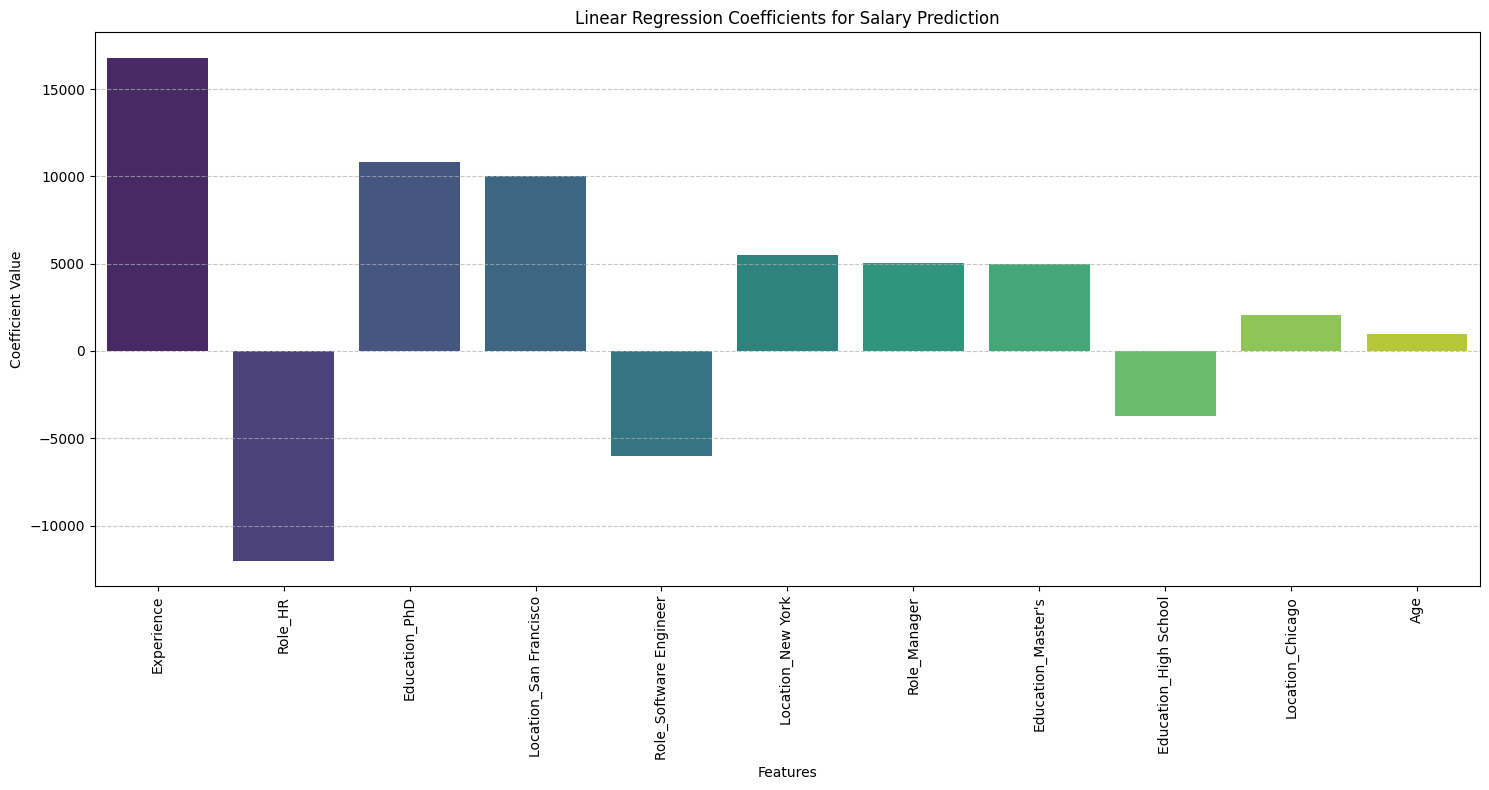

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by the absolute value of coefficients in descending order for better visualization
coefficients_df_sorted = coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Feature', y='Coefficient', hue='Feature', data=coefficients_df_sorted, palette='viridis', legend=False)
plt.title('Linear Regression Coefficients for Salary Prediction')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary: Linear Regression Model for Salary Prediction

### Key Findings
*   **Model Performance (R-squared):** The R-squared value of **0.7550** indicates that approximately 75.50% of the variance in 'Salary' can be explained by the features included in the model. This suggests a reasonably good fit.
*   **Prediction Error (RMSE & MAE):** The Root Mean Squared Error (RMSE) is **$11,954.32**, and the Mean Absolute Error (MAE) is **$9,679.25**. This means, on average, the model's salary predictions are off by about $9,679.25, which is a significant amount and suggests room for improvement, possibly by including more nuanced features or using a more complex model.

### Most Influential Features (Sorted by Absolute Coefficient Magnitude):
1.  **Experience (Coefficient: 16808.38):** This is the strongest positive predictor of salary. A one-unit increase in 'Experience' (e.g., one more year of experience) is associated with an average salary increase of approximately **$16,808.38**, all else being equal. This highlights the high value placed on professional tenure.

2.  **Role_HR (Coefficient: -12032.15):** This is the strongest negative influence among the explicit roles. Being in an 'HR' role is associated with an average salary **$12,032.15 lower** than the baseline role (which was dropped during one-hot encoding, likely 'Analyst' or similar if it was the first category). This suggests HR roles might be compensated less than other roles in this dataset, or less than the implicit baseline.

3.  **Education_PhD (Coefficient: 10847.49):** Holding a PhD is associated with an average salary increase of approximately **$10,847.49** compared to the baseline education level (which was dropped, likely 'Bachelor's' or 'No Degree'), demonstrating a significant premium for higher education.

4.  **Location_San Francisco (Coefficient: 10018.60):** Working in 'San Francisco' is associated with an average salary increase of approximately **$10,018.60** compared to the baseline location (likely 'Austin'), reflecting the higher cost of living and potentially higher demand for talent in that area.

5.  **Role_Software Engineer (Coefficient: -5994.96):** Being a 'Software Engineer' is associated with an average salary **$5,994.96 lower** than the baseline role. Similar to 'Role_HR', this coefficient needs careful interpretation relative to the chosen baseline role. If the baseline role was a 'Data Scientist' or a 'Manager', a negative coefficient for Software Engineer is plausible if those roles generally command higher salaries.

6.  **Location_New York (Coefficient: 5480.11):** Working in 'New York' is associated with an average salary increase of approximately **$5,480.11** compared to the baseline location.

7.  **Role_Manager (Coefficient: 5035.39):** Being a 'Manager' is associated with an average salary increase of approximately **$5,035.39** compared to the baseline role.

8.  **Education_Master's (Coefficient: 4982.58):** Holding a Master's degree is associated with an average salary increase of approximately **$4,982.58** compared to the baseline education level.

9.  **Education_High School (Coefficient: -3752.24):** Having a 'High School' education is associated with an average salary **$3,752.24 lower** than the baseline education level.

10. **Location_Chicago (Coefficient: 2086.93):** Working in 'Chicago' is associated with an average salary increase of approximately **$2,086.93** compared to the baseline location.

11. **Age (Coefficient: 977.02):** 'Age' has a positive but relatively small impact on salary, with a one-year increase in age associated with an average salary increase of about **$977.02**.

### Actionable Insights for HR Management and Compensation Strategies:
*   **Prioritize Experience:** Given 'Experience' is the strongest positive predictor, career growth paths and retention strategies should heavily reward and incentivize tenure and accumulated experience.
*   **Value Education:** Education levels, particularly PhDs and Master's degrees, significantly impact salary. Companies should consider this in their compensation structure and potentially offer support for higher education to upskill employees.
*   **Location-Based Compensation:** Salaries are strongly influenced by location, with San Francisco and New York commanding higher compensation. HR should ensure compensation packages are competitive and adjusted for regional market rates and cost of living.
*   **Role-Specific Compensation Analysis:** The significant coefficients for 'Role_HR', 'Role_Software Engineer', and 'Role_Manager' highlight the need for careful role-based compensation analysis. If 'HR' roles are consistently lower paid, understanding the market average for these roles is crucial to avoid underpaying valuable employees. Similarly, the negative coefficient for 'Software Engineer' might indicate a lower salary relative to the baseline role used in the model; a thorough comparison with industry benchmarks for all roles is recommended.
*   **Continuous Review of Salary Structure:** While age contributes to salary, its relatively smaller coefficient suggests that age alone is not a primary driver compared to experience, education, role, or location. Compensation strategies should reflect a balanced view of these factors. The existing model, while good, still has a notable RMSE, indicating that further analysis, potentially with more features or non-linear models, could refine salary prediction and fairness.